In [4]:
import numpy as np

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [27]:
# Assigning features and label variables

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [28]:
# labelencoder (encode y)
le = LabelEncoder()

# onehot (encode categorical feature)
# ga ada urutan
oh = OneHotEncoder()

# ordinal (encode ordinal feature)
# sd, smp, sma
# rating 1, 2, 3, 4
# low, mid, high
oe = OrdinalEncoder(categories=[["Rainy", "Overcast", "Sunny"], ["Cool", "Mild", "Hot"]])

In [29]:
features_array = np.array(list(zip(weather, temp)))
features_array

array([['Sunny', 'Hot'],
       ['Sunny', 'Hot'],
       ['Overcast', 'Hot'],
       ['Rainy', 'Mild'],
       ['Rainy', 'Cool'],
       ['Rainy', 'Cool'],
       ['Overcast', 'Cool'],
       ['Sunny', 'Mild'],
       ['Sunny', 'Cool'],
       ['Rainy', 'Mild'],
       ['Sunny', 'Mild'],
       ['Overcast', 'Mild'],
       ['Overcast', 'Hot'],
       ['Rainy', 'Mild']], dtype='<U8')

In [30]:
features_encoded = oe.fit_transform(features_array)
print(features_encoded)

[[2. 2.]
 [2. 2.]
 [1. 2.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [2. 1.]
 [2. 0.]
 [0. 1.]
 [2. 1.]
 [1. 1.]
 [1. 2.]
 [0. 1.]]


In [31]:
label_encoded = le.fit_transform(play)
print(label_encoded)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [32]:
assert features_encoded.shape[0] == len(label_encoded)

In [34]:
oe.categories_

[array(['Rainy', 'Overcast', 'Sunny'], dtype=object),
 array(['Cool', 'Mild', 'Hot'], dtype=object)]

In [37]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features_encoded, label_encoded)

#Predict Output
predicted= model.predict([[1, 1]]) # 1:Overcast, 1:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


## Naive Bayes with Multiple Labels

In [39]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [42]:
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']


In [43]:
wine.data.shape

(178, 13)

In [47]:
print(wine.data[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [48]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [49]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    wine.data,
    wine.target,
    test_size=0.3,
    random_state=109,
) # 70% training and 30% test

In [50]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



## Decision Trees

In [63]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

url_diabetes = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv"
# load dataset
pima = pd.read_csv(url_diabetes, header=None, names=col_names, skiprows=1)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima.loc[:, feature_cols].copy() # Features
y = pima.label.copy() # Target variable

In [72]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
) # 70% training and 30% test

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [74]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.658008658008658


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       146
           1       0.54      0.48      0.51        85

    accuracy                           0.66       231
   macro avg       0.63      0.62      0.62       231
weighted avg       0.65      0.66      0.65       231



In [76]:
print(confusion_matrix(y_test, y_pred))

[[111  35]
 [ 44  41]]


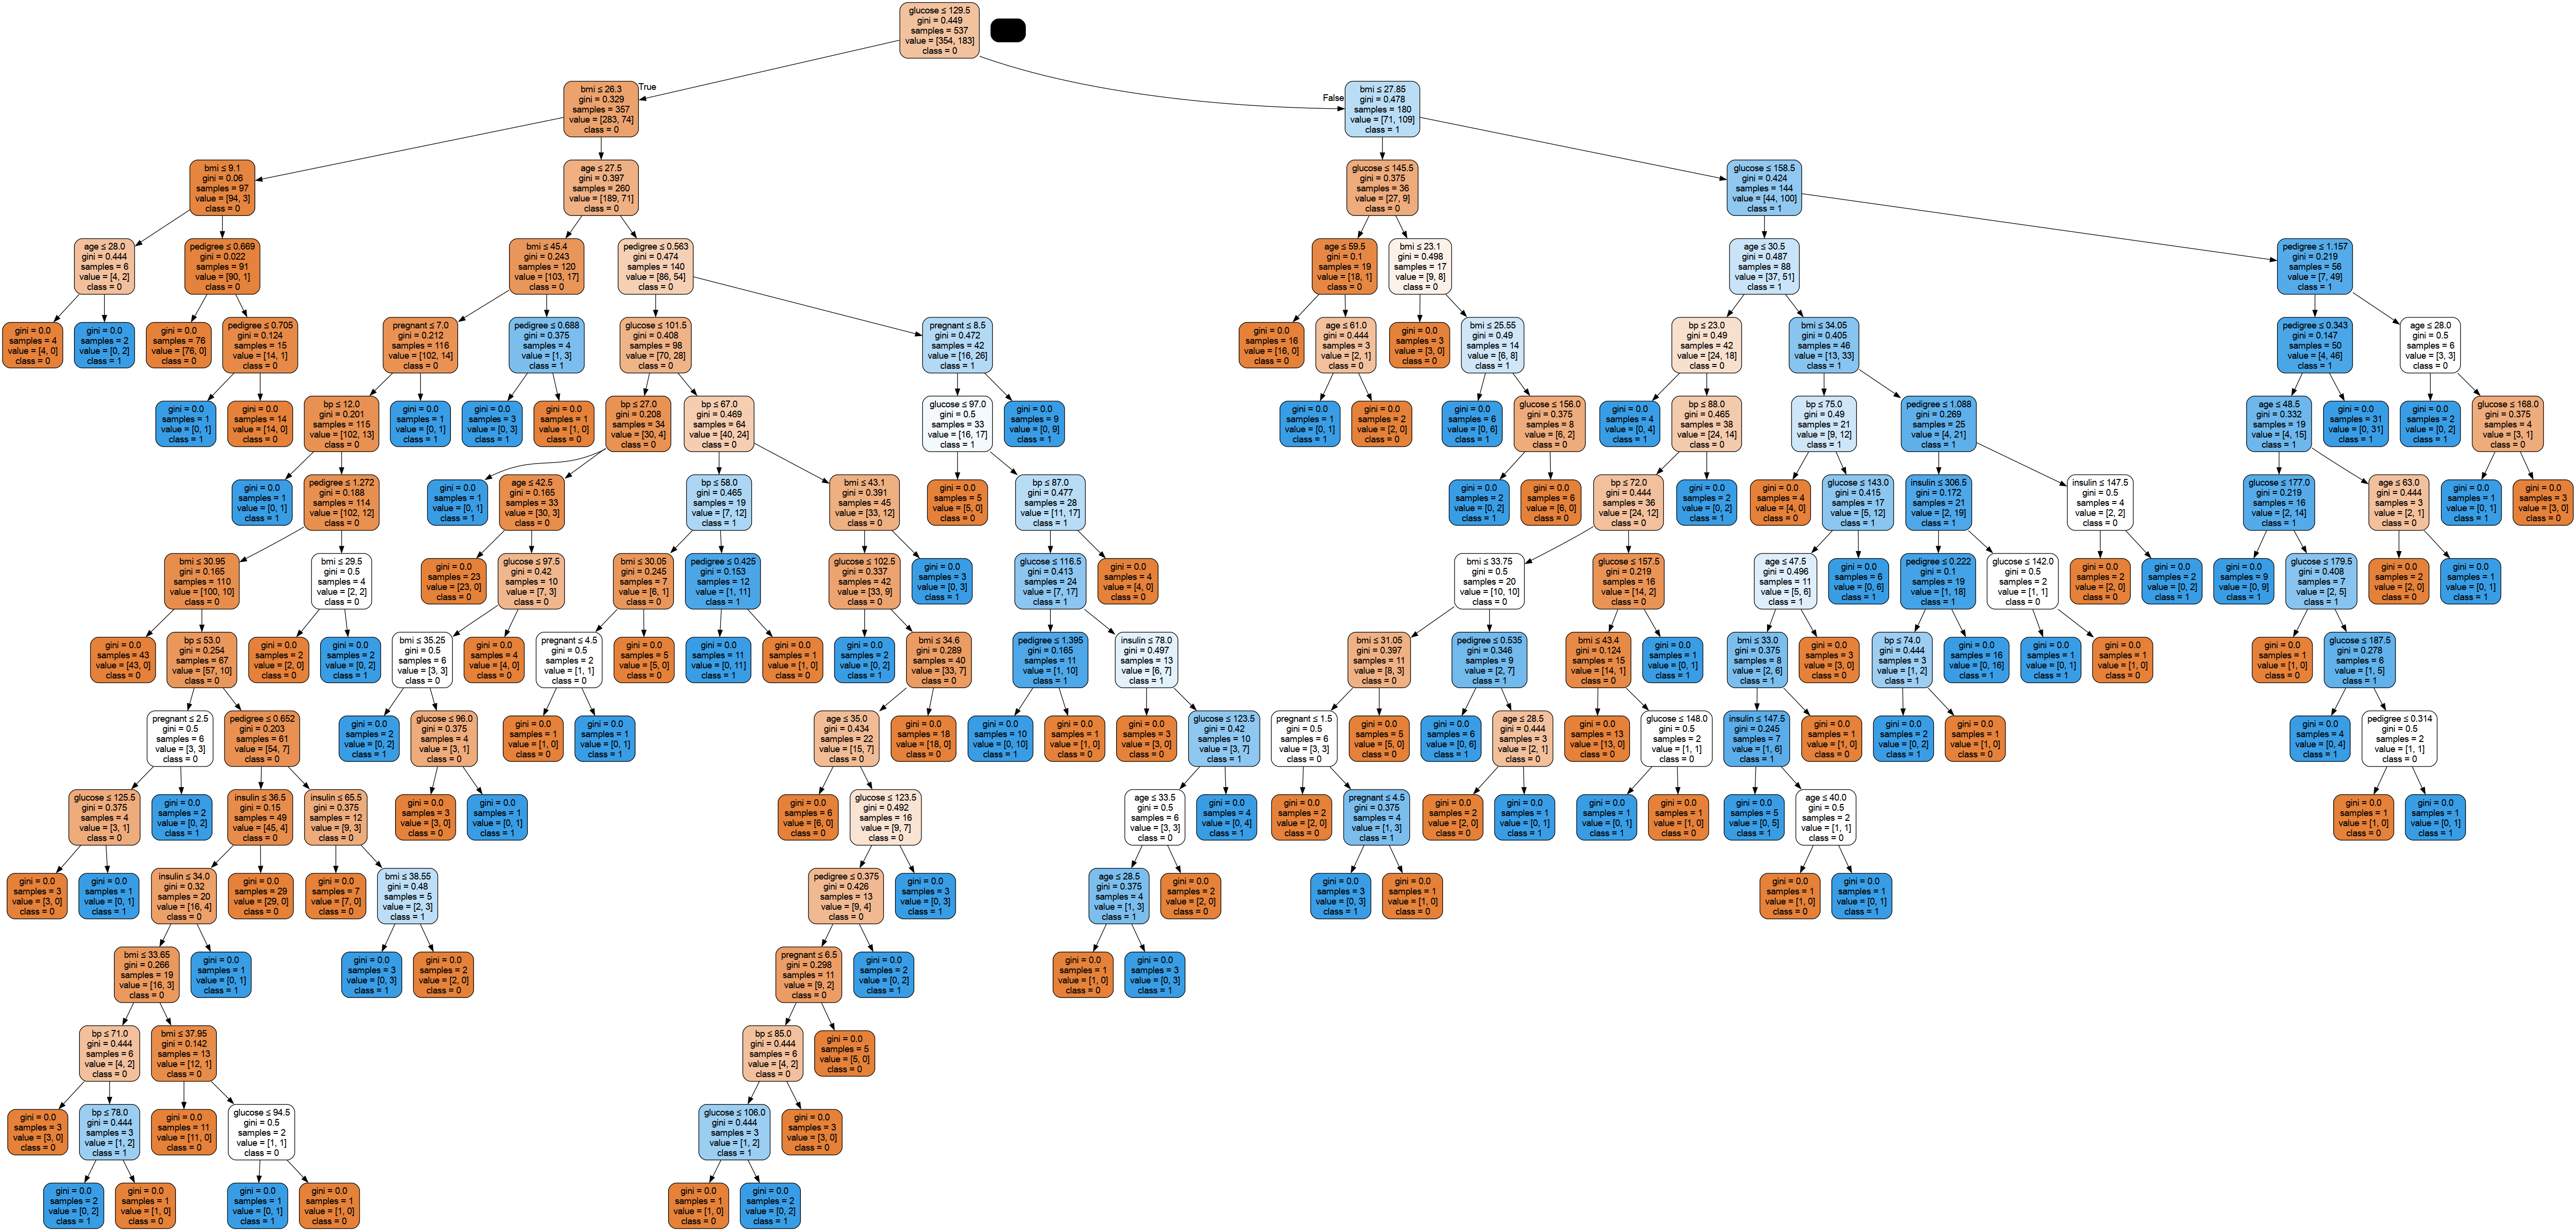

In [79]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image


dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


In [80]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


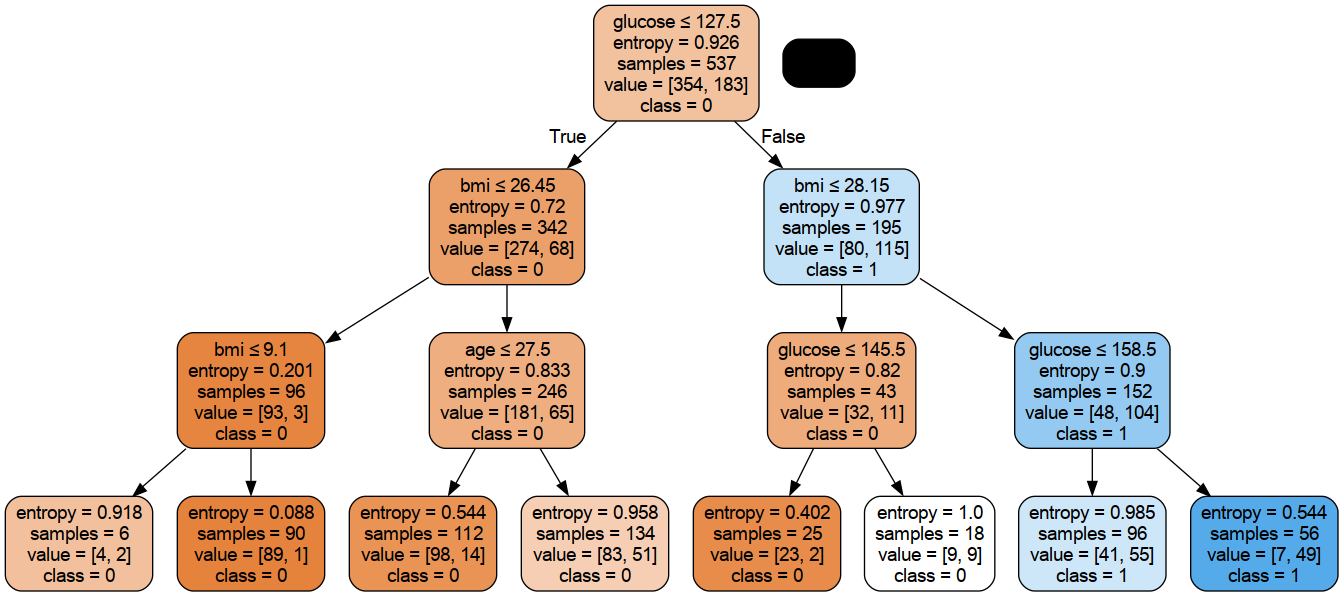

In [81]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Random Forest

In [82]:
from sklearn import datasets

iris = datasets.load_iris()

In [83]:
print(iris.feature_names)

print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [85]:
print(iris.data[:5])
print((iris.target))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [156]:
# data=pd.DataFrame({    
#     'sepal length':iris.data[:,0],    
#     'sepal width':iris.data[:,1],    
#     'petal length':iris.data[:,2],    
#     'petal width':iris.data[:,3],    
#     'species':iris.target 
# }) 

X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = X.columns.str.replace(" (cm)", "")

y = pd.Series(iris.target, name="species")

print(X.head())
print(y.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [157]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

In [158]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [161]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [162]:
accuracy_score(y_test, y_pred_test)

0.9555555555555556

In [163]:
confusion_matrix(y_test, y_pred_test)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 13]])

In [164]:
X_train

,sepal length,sepal width,petal length,petal width
126,6.2,2.8,4.8,1.8
61,5.9,3.0,4.2,1.5
124,6.7,3.3,5.7,2.1
117,7.7,3.8,6.7,2.2
20,5.4,3.4,1.7,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [165]:
pd.DataFrame([[3, 5, 4, 2]], columns=X.columns)

,sepal length,sepal width,petal length,petal width
0,3,5,4,2


In [166]:
clf.predict([[3, 5, 4, 2]])

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [167]:
clf.predict(pd.DataFrame([[3, 5, 4, 2]], columns=X.columns))

array([2])

In [168]:
clf.predict([[5, 2, 4, 1]])

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [169]:
clf.predict([[5, 2, 1, 4]])

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

## Feature Importance

In [170]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [171]:
clf.feature_names_in_

array(['sepal length', 'sepal width', 'petal length', 'petal width'],
      dtype=object)

In [172]:
clf.feature_importances_

array([0.09271812, 0.03125045, 0.39967192, 0.47635951])

In [173]:
feature_imp = pd.Series(
    clf.feature_importances_,
    index=clf.feature_names_in_
).sort_values(ascending=False) 

feature_imp

petal width     0.476360
petal length    0.399672
sepal length    0.092718
sepal width     0.031250
dtype: float64

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called 

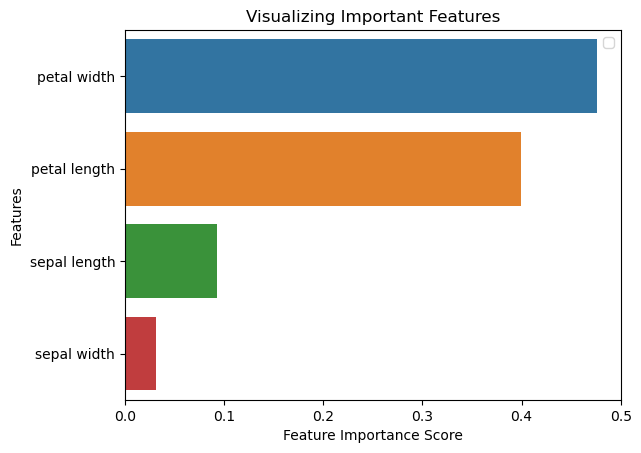

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [175]:
# Split dataset into features and labels
X = X[['petal length', 'petal width','sepal length']]
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [176]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

# prediction on train set
y_pred_train = clf.predict(X_train) 

# prediction on test set
y_pred_test = clf.predict(X_test) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [177]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.93      0.95      0.94        39
           2       0.94      0.91      0.92        32

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



## SVM

In [178]:
cancer = datasets.load_breast_cancer()

In [179]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [180]:
cancer.data.shape

(569, 30)

In [183]:
print(cancer.data[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


In [184]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [185]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [187]:
#Import svm model
from sklearn import svm 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [188]:
print(accuracy_score(y_test, y_pred))

0.9649122807017544


In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [191]:
print(confusion_matrix(y_test, y_pred))

[[ 61   2]
 [  4 104]]


In [192]:
print(104/(104+2))
print(104/(104+4))

0.9811320754716981
0.9629629629629629


In [190]:
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.9811320754716981
0.9629629629629629


## Multiple Algorithm

In [242]:
url_loan = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv'
train = pd.read_csv(url_loan)

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [244]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [252]:
print(train.shape)
for col in train.select_dtypes("object").columns:
    if train[col].nunique() < 10:
        print(col, ":", train[col].nunique(), ":", train[col].unique(),)
    else:
        print(col, ":", train[col].nunique())

(614, 13)
Loan_ID : 614
Gender : 2 : ['Male' 'Female' nan]
Married : 2 : ['No' 'Yes' nan]
Dependents : 4 : ['0' '1' '2' '3+' nan]
Education : 2 : ['Graduate' 'Not Graduate']
Self_Employed : 2 : ['No' 'Yes' nan]
Property_Area : 3 : ['Urban' 'Rural' 'Semiurban']
Loan_Status : 2 : ['Y' 'N']


In [253]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [254]:
train.fillna(train.select_dtypes(include="number").mean(), inplace=True)
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [255]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [256]:
# train.Gender.fillna(train.Gender.mode()[0],inplace=True)
# train.Married.fillna(train.Married.mode()[0],inplace=True)
# train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
# train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  

for col in train.select_dtypes("O").columns:
    train[col].fillna(train[col].mode()[0], inplace=True)

train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

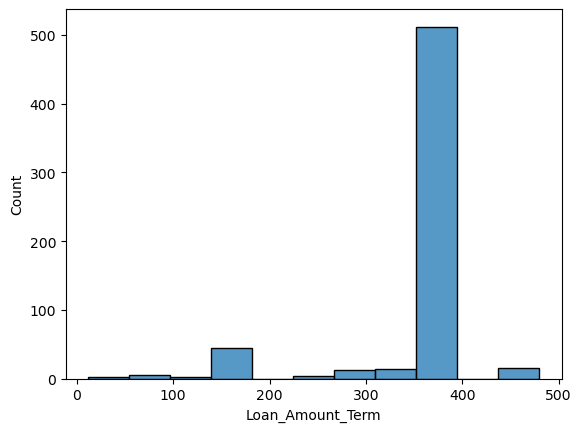

In [257]:
sns.histplot(train.Loan_Amount_Term)

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

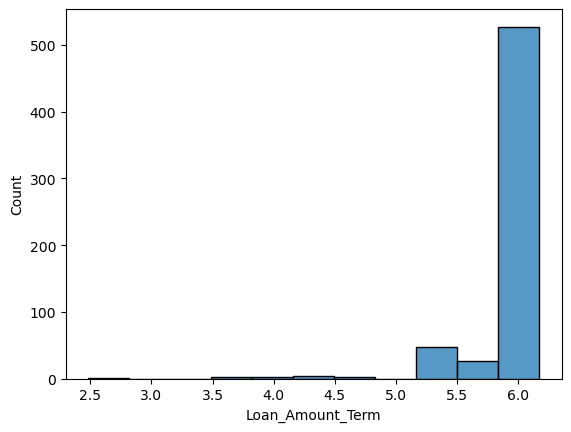

In [258]:
sns.histplot(np.log(train.Loan_Amount_Term))

In [259]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

In [264]:
X = train.drop(["Loan_ID", "Loan_Status"], axis=1)
y = train.Loan_Status.copy()

In [265]:
X = pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,5.886104,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.000000,5.886104,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,5.886104,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,5.886104,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True


In [266]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [267]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [268]:
#(a)LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

/home/nikki/workspace/kmi-batch-5/.conda_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [269]:
pred_cv=model.predict(x_cv)

In [270]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.8130081300813008
[[21 21]
 [ 2 79]]


In [271]:
#(b)DECISION TREE ALGORITHM

from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [272]:
pred_cv1=dt.predict(x_cv)

In [273]:
print(accuracy_score(y_cv,pred_cv1))
matrix1=confusion_matrix(y_cv,pred_cv1)
print(matrix1)

0.7073170731707317
[[23 19]
 [17 64]]


In [274]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [275]:
pred_cv2=rf.predict(x_cv)

In [276]:
print(accuracy_score(y_cv,pred_cv2))
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

0.7967479674796748
[[25 17]
 [ 8 73]]


In [277]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [278]:
pred_cv3=svm_model.predict(x_cv)

In [279]:
print(accuracy_score(y_cv,pred_cv3))
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.6585365853658537
[[ 0 42]
 [ 0 81]]


In [280]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

pred_cv4=nb.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

0.7967479674796748
[[21 21]
 [ 4 77]]


In [281]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

pred_cv5=kNN.predict(x_cv)

print(accuracy_score(y_cv,pred_cv5))
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

0.6504065040650406
[[ 7 35]
 [ 8 73]]


In [282]:
print("Logistic Regression:", accuracy_score(y_cv,pred_cv))
print("Decision Tree:", accuracy_score(y_cv,pred_cv1))
print("Random Forest:", accuracy_score(y_cv,pred_cv2))
print("SVM:", accuracy_score(y_cv,pred_cv3))
print("Naive Bayes:", accuracy_score(y_cv,pred_cv4))
print("KNN:", accuracy_score(y_cv,pred_cv5))

Logistic Regression: 0.8130081300813008
Decision Tree: 0.7073170731707317
Random Forest: 0.7967479674796748
SVM: 0.6585365853658537
Naive Bayes: 0.7967479674796748
KNN: 0.6504065040650406


In [283]:
#Write test results in csv file

predictions=pd.DataFrame(pred_cv, columns=['predictions']).to_csv('out/H8_NB_Credit_Predictions.csv')